In [2]:
# Regularization : 50,000 training images, 30 epochs, 
#              100 hidden neurons
#              10 mini-batches,
#              0.5 learining rate
#              5.0 reg parameter
#              difference 1.06
#                 
#              Validation data is used to compare with the 
#              earlier graphs.
#
# Plot graphs to illustrate the problem of overfitting.

import json
import random
import sys
import time

import matplotlib.pyplot as plt
import numpy as np

import mnist_loader
import network
sys.path.append('../src/')

In [10]:
def main():
    start = time.time()
    
    run_network()
    make_plots()
    
    end = time.time()
    print(end - start)

    import winsound
    duration = 1000  # milliseconds
    freq = 440  # Hz
    winsound.Beep(freq, duration)

def run_network():
    training_data , validation_data , test_data = mnist_loader.load_data_wrapper()
    net = network.Network([784, 100, 10], cost=network.CrossEntropyCost)
    net.large_weight_initializer()
    test_cost, test_accuracy, training_cost, training_accuracy \
        = net.SGD(training_data, 30, 10, 0.5, lmbda = 5.0,
                  evaluation_data=validation_data,
                  monitor_evaluation_cost=True,
                  monitor_evaluation_accuracy=True,
                  monitor_training_cost=True,
                  monitor_training_accuracy=True)
    
    net.save('Regularized_net_100hidden.json')
    
    f = open('regularized_results_100hidden.json', "w") 
    result_data = {
        'test_cost' : test_cost,
        'test_accuracy' : test_accuracy,
        'training_cost': training_cost,
        'training_accuracy': training_accuracy
        }
    json.dump(result_data, f)
    f.close()


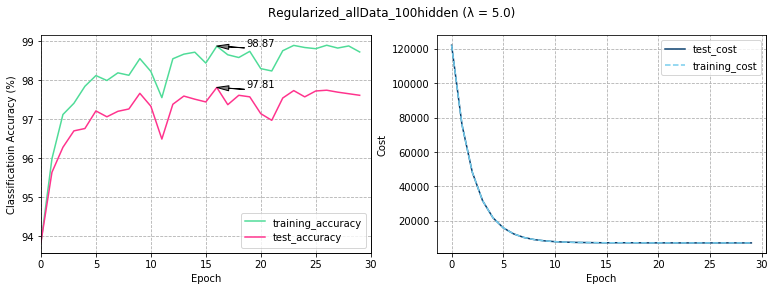

difference 1.06


In [5]:
def make_plots():
    f = open('regularized_results_100hidden.json', 'r') 
    result_data = json.load(f)
    f.close()
    
    test_cost = result_data['test_cost']
    test_accuracy = result_data['test_accuracy']
    training_cost = result_data['training_cost']
    training_accuracy = result_data['training_accuracy']
    
    plots(test_cost, test_accuracy,  training_cost, training_accuracy)

def plots(test_cost, test_accuracy,  training_cost, training_accuracy):
    ymax = np.amax(test_accuracy)
    xpos = test_accuracy.index(ymax)
    max_acc = (xpos, ymax/100)
    
    training_cost_xmin = 0
    test_cost_xmin = 0
    test_accuracy_xmin = 0
    training_accuracy_xmin = 0
    num_epochs = 30
    training_set_size = 50000
    
    y2 = round(training_accuracy[xpos]*100/training_set_size, 2)

    max2_acc = (xpos, y2)

    fig, axes = plt.subplots(1, 2, figsize=(13, 4))
    axes[0].tick_params(color='w', labelcolor='w')
    axes[1].tick_params(color='w', labelcolor='w')

    fig.suptitle('Regularized_allData_100hidden (λ = 5.0)', fontsize=12)
    
    arrow = arrowprops=dict(facecolor='gray', width=0.1, headwidth=5)
    label = 'difference ' + str(round(y2-ymax/100, 2))
    
    ax = fig.add_subplot(121)
    
    ax.plot(np.arange(training_accuracy_xmin, num_epochs), 
            [accuracy*100.0/training_set_size 
             for accuracy in training_accuracy[training_accuracy_xmin:num_epochs]],
            color='#4FDC98', label='training_accuracy') 
    ax.annotate(str(y2), xy=max2_acc,
                color='k', xytext=(20, y2), ha='center',
                arrowprops=arrow)
    
    ax.plot(np.arange(test_accuracy_xmin, num_epochs), 
            [accuracy/100.0
             for accuracy in test_accuracy[test_accuracy_xmin:num_epochs]],
            color='#FF338D', label='test_accuracy') #+'\n'+label)
    ax.annotate(str(ymax/100), xy=max_acc, color='k',
                xytext=(20, ymax/100),
                ha='center', arrowprops=arrow)
    
    ax.set_xlim([test_accuracy_xmin, num_epochs])    
    ax.grid(True, linestyle='--')
    ax.set_ylabel('Classificatioin Accuracy (%)')
    ax.set_xlabel('Epoch')
    plt.legend(loc='lower right')
    
    ax = fig.add_subplot(122)
    ax.plot(np.arange(test_cost_xmin, num_epochs),
            test_cost[test_cost_xmin:num_epochs],
            color='#083e6d', label='test_cost')    
    ax.plot(np.arange(training_cost_xmin, num_epochs), 
            training_cost[training_cost_xmin:num_epochs],  
            color='#76cded', linestyle='--', 
            label='training_cost')
    ax.grid(True, linestyle='--')
    ax.set_ylabel('Cost')
    ax.set_xlabel('Epoch')
    plt.legend(loc='best')
    
    plt.show()
    fig.savefig('Regularized_allData_100hidden.png')
    
    print(label)

make_plots()

# if __name__ == "__main__":
#     main() 